In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

from math import atan, acos, cos, sin, sqrt
import qutip as qt
from cmath import exp
from scipy.special import binom
from math import pow
rtwo = sqrt(2)
rtwo_m1 = 1/rtwo
beta = acos(1/sqrt(3)) / 2

In [3]:
phi = atan(sin(beta)/2 / rtwo_m1*(cos(beta)+rtwo_m1*sin(beta)))

In [4]:
pi = 2*acos(0)
phi

0.37561545870672297

In [5]:
cos(2*phi)/cos(phi)

0.7856211965640852

In [6]:
pi/2

1.5707963267948966

In [7]:
T = cos(beta)*qt.basis(2,0)+exp(1j*pi/4)*sin(beta)*qt.basis(2,1)
T

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.88807383+0.j        ]
 [ 0.32505758+0.32505758j]]

In [8]:
zer = qt.basis(2,0)
plus = (qt.basis(2,0)+qt.basis(2,1)).unit()
plus_i = (qt.basis(2,0)+1j*qt.basis(2,1)).unit()

In [9]:
import numpy as np
states = [zer,plus,plus_i]
for state in states:
    print(state.overlap(T))
    print(np.angle(state.overlap(T)))

(0.888073833977+0j)
0.0
(0.85781345189+0.22985042169j)
0.261799387799
(0.85781345189-0.22985042169j)
-0.261799387799


In [10]:
phi = np.angle(plus.overlap(T))
cos(phi)

0.9659258262890683

In [11]:
Z = 1 + sqrt(0.5)*cos(phi) + sqrt(0.5)*cos(phi)
candidate = 1/sqrt(3*Z)*(qt.tensor(zer,zer)+exp(-1j*phi)*qt.tensor(zer,plus_i)+exp(1j*phi)*qt.tensor(zer,plus))
# +
#                                        qt.tensor(plus_i,plus)+exp(-1j*phi)*qt.tensor(plus_i,zer)+exp(1j*phi)*qt.tensor(plus,zer)+
#                                        qt.tensor(plus,plus_i)+exp(-2j*phi)*qt.tensor(plus_i,plus_i)+exp(2j*phi)*qt.tensor(plus,plus))
candidate.overlap(qt.tensor(T,T))*candidate.overlap(qt.tensor(T,T))

(0.78867513459481264+0j)

In [12]:
3*pow(cos(beta),4)/Z

0.7886751345948129

In [13]:
def sum_Z(t):
    tot = 0
    for i in range(1,t+1):
        for j in range(t-i+1):
            tot += binom(i,j)*cos(j*pi/12)
    return tot

def expectation(k,t):
    return 1 + (pow(3,k)-1)/(pow(3,t)-1)*sum_Z(t)

def naive(t):
    return pow(3,t)*pow(cos(beta),2*t) -1

In [15]:
res = [sum_Z(i) for i in range(13)]
res2 = [expectation(k,12) for k in range(13)]
res3 = [naive(i) for i in range(13)]

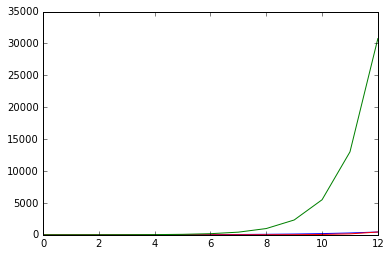

In [16]:
plt.plot(np.arange(13), res,'b',np.arange(13),res2,'r',np.arange(13),res3,'g')

In [53]:
states = [T for i in range(16)]
state = qt.tensor(states)
np.sum(state.dims[0])
data = np.zeros((32,2))
for i in range(np.sum(state.dims[0])):
    print(bin(i))
    data[i][0] = bin(i).count("1")
    data[i][1] = np.absolute(np.asscalar(state[i]))
state.norm()

0b0
0b1
0b10
0b11
0b100
0b101
0b110
0b111
0b1000
0b1001
0b1010
0b1011
0b1100
0b1101
0b1110
0b1111
0b10000
0b10001
0b10010
0b10011
0b10100
0b10101
0b10110
0b10111
0b11000
0b11001
0b11010
0b11011
0b11100
0b11101
0b11110
0b11111


1.0000000000002038

In [54]:
tots = np.zeros(int(np.amax(data[:,0])))
for i in range(tots.size):
    for j in range(32):
        if float(i) == data[j,0]:
            tots[i]+=data[j,1]
tots
np.sum(tots)
np.argmax(tots)

2

In [67]:
qt.tensor([T for i in range(16)]).shape

[65536, 1]

In [79]:
def find_max_weight(t):
    print(t)
    state = qt.tensor([T for i in range(t)])
    _len = state.shape[0]
    data = np.zeros((_len,2))
    for i in range(_len):
        data[i][0] = bin(i).count("1")
        val = np.asscalar(state[i])
        data[i][1] = np.absolute(val)
    tots = np.zeros(int(np.amax(data[:,0])))
    for i in range(tots.size):
        for j in range(_len):
            if float(i) == data[j,0]:
                tots[i]+=data[j,1]
    return np.argmax(tots)

In [85]:
res = [find_max_weight(i) for i in range(1,16)]
res2 = [(1-cos(beta)*cos(beta))*t + sqrt(t) for t in range(1,16)]
res3 = [(1-cos(beta)*cos(beta))*t - sqrt(t) for t in range(1,16)]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


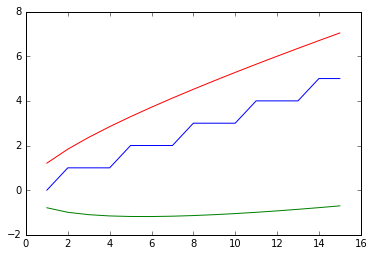

In [86]:
plt.plot(np.arange(1,16), res, 'b', np.arange(1,16), res2, 'r', np.arange(1,16), res3, 'g')

In [90]:
from math import log2
cb2 = cos(beta)*cos(beta)
-1*(cb2*log2(cb2) + (1-cb2)*log2(1-cb2))

0.7440075512490014